In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
from QubitNetwork import QubitNetwork
from qubit_network import load_network_from_file, sgd_optimization, transfer_J_values
import utils
from utils import chop, complex2bigreal, bigreal2complex
from results_analysis_utils import group_similar_elements, vanishing_elements

pairs = list(itertools.combinations(range(4), 2))

## Hadamard gate reached with perfect fidelity using 3 qubits + 2 ancillae.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


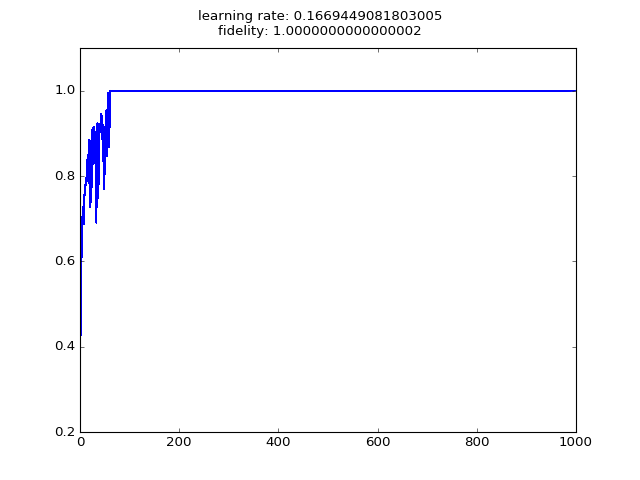

Finished training
Network saved in nets/hadamard5qb.pickle


In [11]:
net = QubitNetwork(
    num_qubits=5,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.hadamard_transform(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/hadamard5qb.pickle'
)

In [51]:
net = QubitNetwork.load_network_from_file('nets/hadamard5qb.pickle')
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2, 2]] * 2)

p0 = qutip.ket2dm(qutip.basis(2, 0))
p1 = qutip.ket2dm(qutip.basis(2, 1))
pd01 = qutip.Qobj([[0, 1], [0, 0]])
pd10 = qutip.Qobj([[0, 0], [1, 0]])
i3 = qutip.tensor([qutip.qeye(2) for _ in range(3)])
p00 = qutip.tensor(p0, p0)
p01 = qutip.tensor(p0, p1)
p10 = qutip.tensor(p1, p0)
p11 = qutip.tensor(p1, p1)


ntlp = utils.normalize_topleft_phase

extracted00 = chop(ntlp((qutip.tensor(i3, p00) * gate * qutip.tensor(i3, p00)).ptrace([0, 1, 2])))
extracted01 = chop(ntlp((qutip.tensor(i3, p01) * gate * qutip.tensor(i3, p01)).ptrace([0, 1, 2])))
extracted10 = chop(ntlp((qutip.tensor(i3, p10) * gate * qutip.tensor(i3, p10)).ptrace([0, 1, 2])))
extracted11 = chop(ntlp((qutip.tensor(i3, p11) * gate * qutip.tensor(i3, p11)).ptrace([0, 1, 2])))

extracted00

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339
   0.35355339 -0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
   0.35355339 -0.35355339]]

In [46]:
qutip.hadamard_transform(3)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339
   0.35355339 -0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
   0.35355339 -0.35355339]]

### Failing to reach a randomly picked unitary, with two ancillary qubits

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


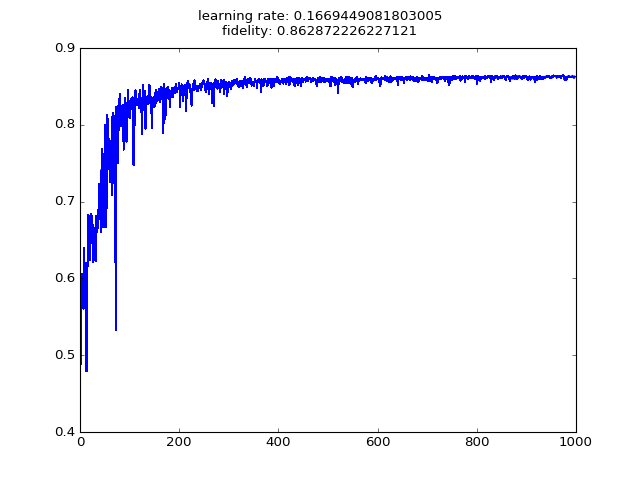

Finished training
Network saved in nets/random5qb.pickle


In [35]:
rand_U = qutip.rand_unitary(8, dims=[[2, 2, 2]] * 2)
net = QubitNetwork.QubitNetwork(
    num_qubits=5,
    interactions='all',
    self_interactions='all',
    system_qubits=3
)
net, _ = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=rand_U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/random5qb.pickle'
)

## Also the Fourier matrix is a fail

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


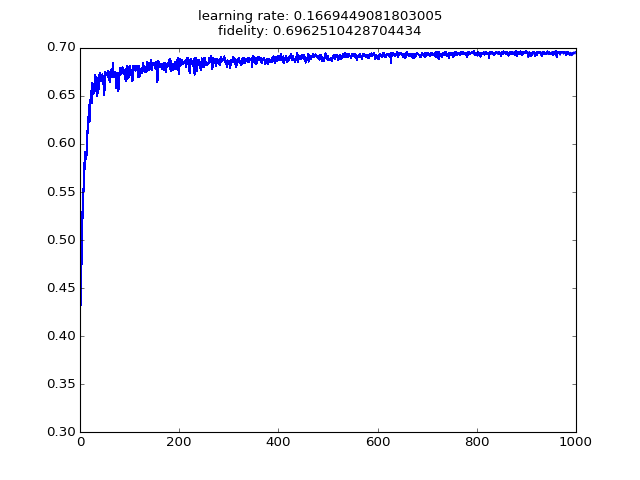

Finished training
Network saved in nets/qft5qb.pickle


In [52]:
import qutip.qip.algorithms.qft
net = QubitNetwork.QubitNetwork(
    num_qubits=5,
    interactions='all',
    self_interactions='all',
    system_qubits=3
)
net, _ = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/qft5qb.pickle'
)

In [76]:
kets = np.asarray([qutip.rand_ket(4).data.toarray() for _ in range(4)]).reshape((4, 4))
kets2 = np.asarray([qutip.rand_ket(4).data.toarray() for _ in range(4)]).reshape((4, 4))
h = qutip.tensor(qutip.sigmaz(), qutip.sigmaz()).data.toarray()



Ukets = np.tensordot(h, kets, axes=[[1], [1]]).T

display(kets)
# kets3 = np.tensordot()
Ukets

array([[-0.20867573+0.48094162j, -0.10788811-0.45968291j,
        -0.24295472+0.44661541j, -0.49346054-0.01434374j],
       [ 0.01740894-0.36087281j, -0.26672928+0.4553151j ,
         0.46540179+0.33317904j, -0.25746569-0.44397716j],
       [-0.53901419-0.32762433j,  0.07191807-0.1538616j ,
        -0.62637233-0.42197362j,  0.03532570-0.04035423j],
       [-0.50250901+0.01044813j,  0.18737892+0.28853923j,
        -0.34883862+0.32651138j,  0.54953861-0.31419584j]])

array([[-0.20867573+0.48094162j,  0.10788811+0.45968291j,
         0.24295472-0.44661541j, -0.49346054-0.01434374j],
       [ 0.01740894-0.36087281j,  0.26672928-0.4553151j ,
        -0.46540179-0.33317904j, -0.25746569-0.44397716j],
       [-0.53901419-0.32762433j, -0.07191807+0.1538616j ,
         0.62637233+0.42197362j,  0.03532570-0.04035423j],
       [-0.50250901+0.01044813j, -0.18737892-0.28853923j,
         0.34883862-0.32651138j,  0.54953861-0.31419584j]])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


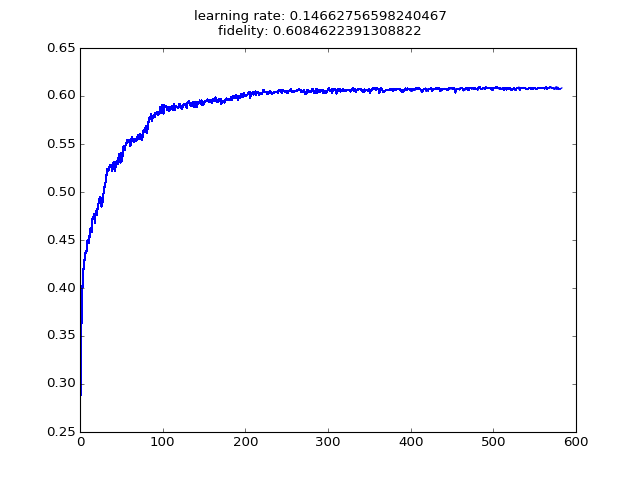

Finished training
Final fidelity: 0.6161851261427038


In [3]:
import qutip.qip.algorithms.qft
net = QubitNetwork(
    num_qubits=6,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
#     saveafter_file='nets/hadamard5qb.pickle'
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


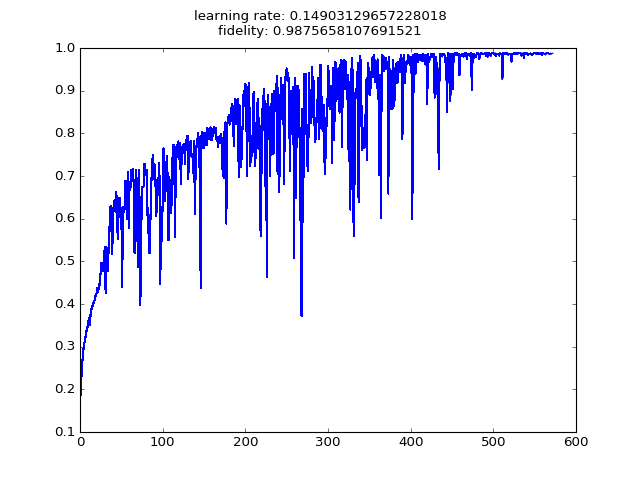

In [ ]:
import qutip.qip.algorithms.qft
net = QubitNetwork(
    num_qubits=8,
    interactions='all',
    system_qubits=3
)
sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.qip.algorithms.qft.qft(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01,
#     saveafter_file='nets/hadamard5qb.pickle'
)